# Time series analysis

In [ ]:
#import scraping data
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv("union.csv", parse_dates=['date'])
df.head()

,title,location,company,date
0,CUSTOMER SERVICE REPRESENTATIVE,Remote,Transcard Payments LLC,2021-05-27
1,"Director, Software Development FinTech","Arlington, VA",Amazon.com Services LLC,2021-05-05
2,Corporate M&A Associate,"Washington, DC 20037 (Foggy Bottom area)",Pollack Badawi Group,2021-05-12
3,Head of FinTech Customer Success,Remote,Tern (FinTech as a Service),2021-05-20
4,Senior Investment Officer,"Washington, DC 20433 (Foggy Bottom area)",World Bank Group,2021-05-26


In [ ]:
#counting the positions posted for each day
series = df["date"].value_counts(ascending = True)

In [ ]:
series

2021-05-10      1
2021-05-17      2
2021-05-03      3
2021-05-09      6
2021-05-02      8
2021-04-28     11
2021-05-16     13
2021-04-29     15
2021-05-23     23
2021-05-24     29
2021-04-30     34
2021-05-04     36
2021-05-19     38
2021-05-01     38
2021-05-08     39
2021-05-15     40
2021-05-11     44
2021-05-06     45
2021-05-13     45
2021-05-05     46
2021-05-07     49
2021-05-14     54
2021-05-12     59
2021-05-22     65
2021-05-18     69
2021-05-21     70
2021-05-25     77
2021-05-20     94
2021-05-27    103
2021-05-26    110
2021-04-27    396
Name: date, dtype: int64

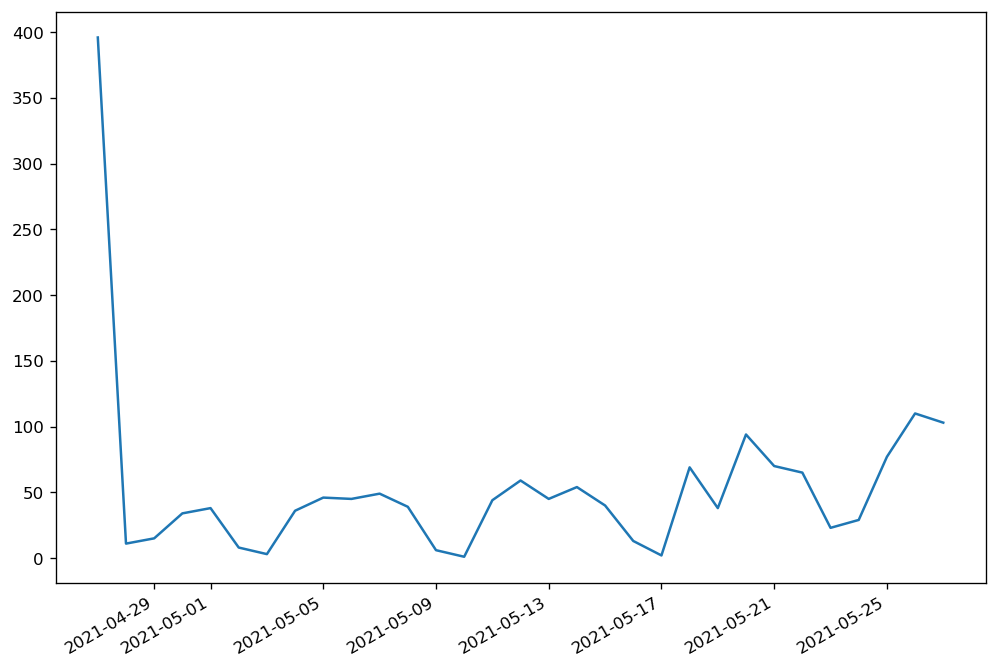

In [ ]:
# Draw Plot
from matplotlib import pyplot
series.plot()
pyplot.show()

In [ ]:
dfseries = pd.DataFrame(series)

In [ ]:
dfseries

,date
2021-05-10,1
2021-05-17,2
2021-05-03,3
2021-05-09,6
2021-05-02,8
2021-04-28,11
2021-05-16,13
2021-04-29,15
2021-05-23,23
2021-05-24,29


In [ ]:
dfseries['Date'] = dfseries.index

In [ ]:
dfseries.columns = ['jobs','date']

In [ ]:
dfseries.sort_values("date",inplace=True)

In [ ]:
dfseries

,jobs,date
2021-04-27,396,2021-04-27
2021-04-28,11,2021-04-28
2021-04-29,15,2021-04-29
2021-04-30,34,2021-04-30
2021-05-01,38,2021-05-01
2021-05-02,8,2021-05-02
2021-05-03,3,2021-05-03
2021-05-04,36,2021-05-04
2021-05-05,46,2021-05-05
2021-05-06,45,2021-05-06


In [ ]:
x = dfseries['date'].values
y = dfseries['jobs'].values

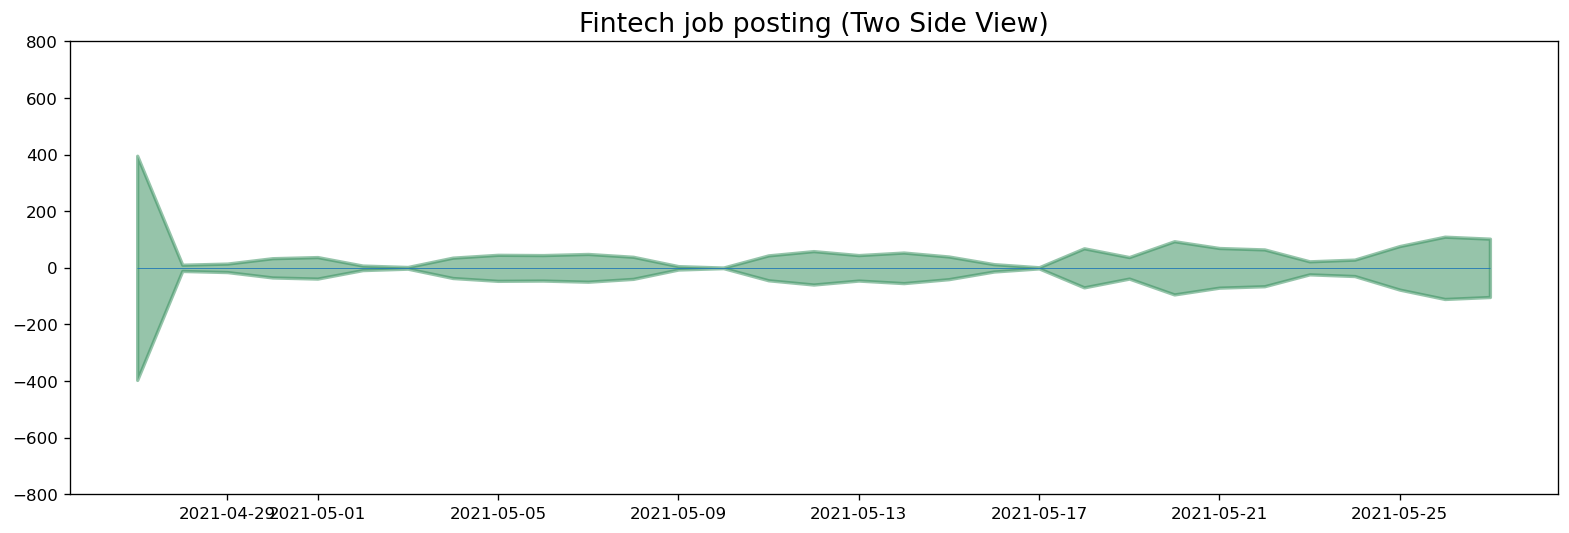

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y, y2=-y, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Fintech job posting (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(dfseries.date), xmax=np.max(dfseries.date), linewidth=.5)
plt.show()

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import prettytable
import warnings
warnings.filterwarnings('ignore')

dfseries = dfseries['jobs'].astype('float32') 
print ('data summary') 
# 打印输出时间序列数据概况
print (dfseries.describe()) 

data summary
count     31.000000
mean      53.612904
std       69.864479
min        1.000000
25%       19.000000
50%       40.000000
75%       62.000000
max      396.000000
Name: jobs, dtype: float64


In [ ]:
def pre_table(table_name, table_rows):

    table = prettytable.PrettyTable()  # create table
    table.field_names = table_name  # table name
    for i in table_rows:
        table.add_row(i)
    return table


# ADF Test
def adf_val(ts, ts_title, acf_title, pacf_title):

    plt.figure()
    plt.plot(ts)  
    plt.title(ts_title)
    plt.show()
    plot_acf(ts, lags=10, title=acf_title).show()
    plot_pacf(ts, lags=10, title=pacf_title).show()  
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ts)  # ADF Test
    table_name = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical_values', 'icbest']
    table_rows = [[adf, pvalue, usedlag, nobs, critical_values, icbest]]
    adf_table = pre_table(table_name, table_rows)
    print ('stochastic score')
    print (adf_table)
    return adf, pvalue, critical_values,


# white noise verification
def acorr_val(ts):
   
    lbvalue, pvalue = acorr_ljungbox(ts, lags=1)  
    table_name = ['lbvalue', 'pvalue'] 
    table_rows = [[lbvalue, pvalue]] 
    acorr_ljungbox_table = pre_table(table_name, table_rows)
    print ('stationarity score') 
    print (acorr_ljungbox_table)  
    return pvalue 
 

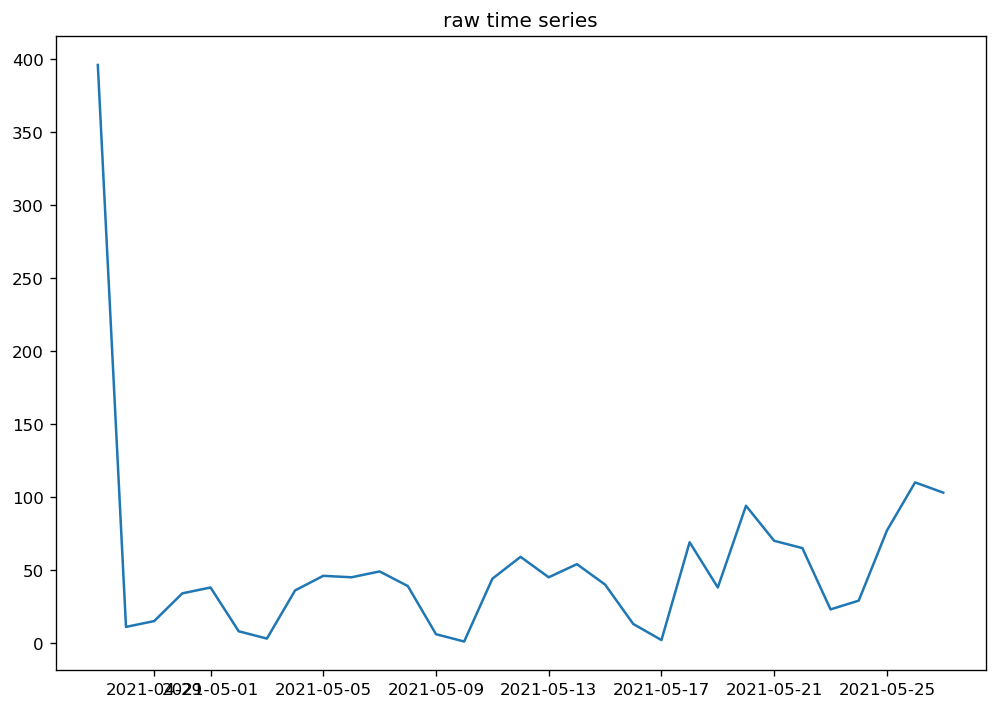

stochastic score
+--------------------+--------+---------+------+-----------------------------------------------------------------------------------+--------------------+
|        adf         | pvalue | usedlag | nobs |                                  critical_values                                  |       icbest       |
+--------------------+--------+---------+------+-----------------------------------------------------------------------------------+--------------------+
| 3.1170438613879905 |  1.0   |    9    |  21  | {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143} | 176.02795763639298 |
+--------------------+--------+---------+------+-----------------------------------------------------------------------------------+--------------------+
stationarity score
+--------------+--------------+
|   lbvalue    |    pvalue    |
+--------------+--------------+
| [0.00461147] | [0.94585904] |
+--------------+--------------+


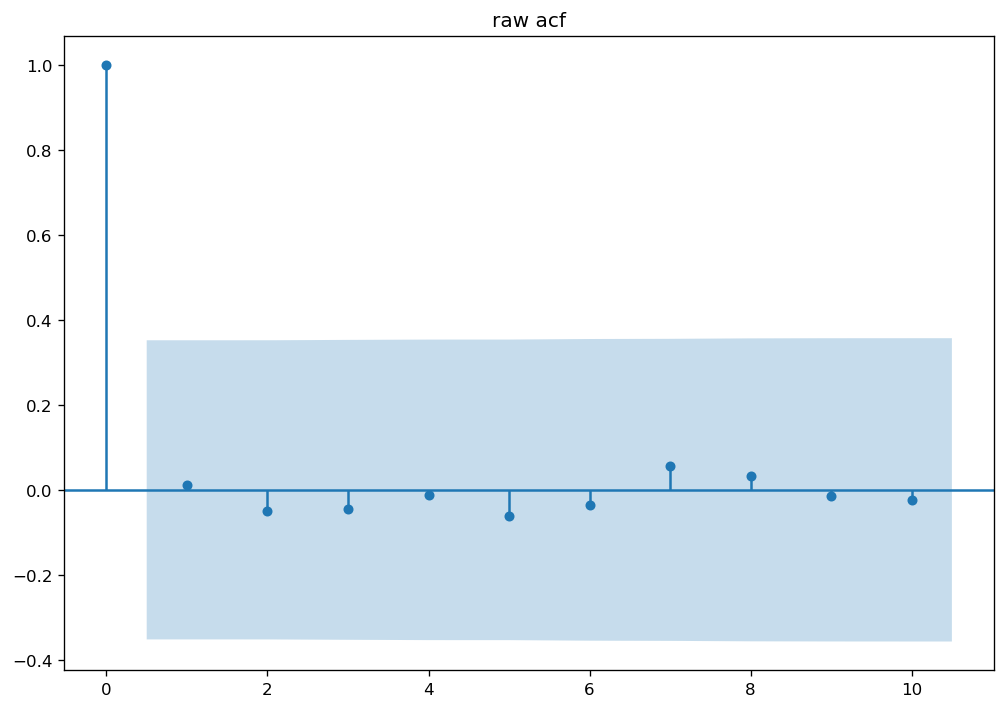

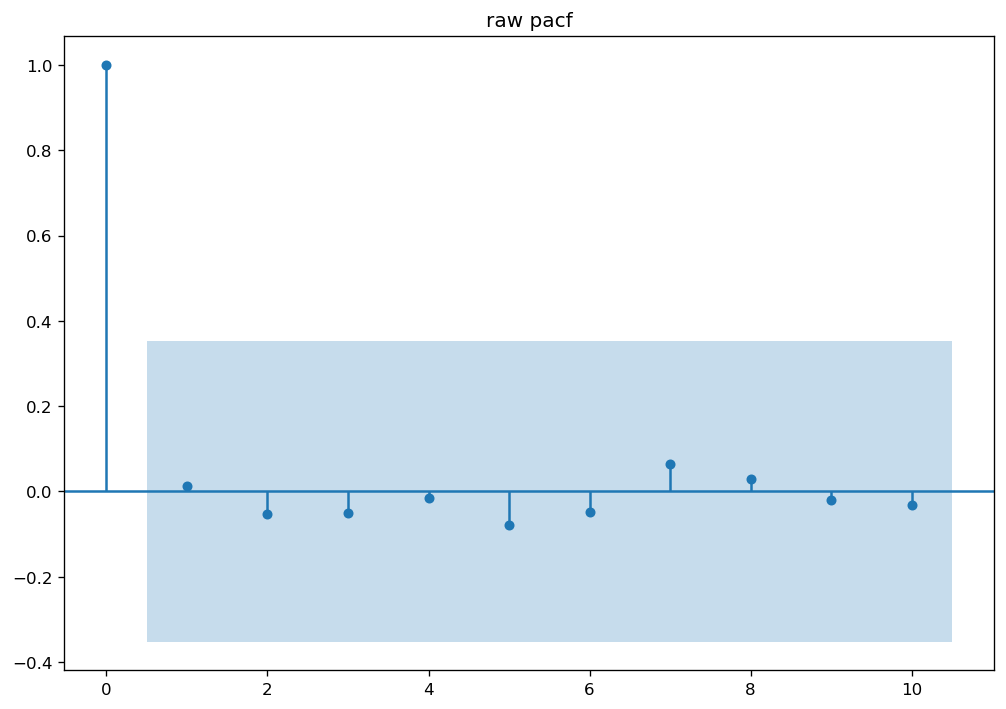

In [ ]:
# ADF test
adf, pvalue1, critical_values = adf_val(dfseries, 'raw time series', 'raw acf', 'raw pacf')  
# White noise verification
pvalue2 = acorr_val(dfseries) 

as we can see, the number of job posting in 2021-4-27 is an outlier and influences the stationary process of whole data. So we decide to do time series analysis without that day.

In [ ]:
dfseries1 = dfseries.drop(dfseries[dfseries['date']=='2021-04-27'].index)
dfseries1 = dfseries1['jobs'].astype('float32') 
print ('data summary')
print (dfseries1.describe()) 
dfserieso = dfseries.drop(dfseries[dfseries['date']=='2021-04-27'].index)

data summary
count     30.000000
mean      42.200001
std       29.533617
min        1.000000
25%       17.000000
50%       39.500000
75%       57.750000
max      110.000000
Name: jobs, dtype: float64


In [ ]:
dfserieso

,jobs,date
2021-04-28,11,2021-04-28
2021-04-29,15,2021-04-29
2021-04-30,34,2021-04-30
2021-05-01,38,2021-05-01
2021-05-02,8,2021-05-02
2021-05-03,3,2021-05-03
2021-05-04,36,2021-05-04
2021-05-05,46,2021-05-05
2021-05-06,45,2021-05-06
2021-05-07,49,2021-05-07


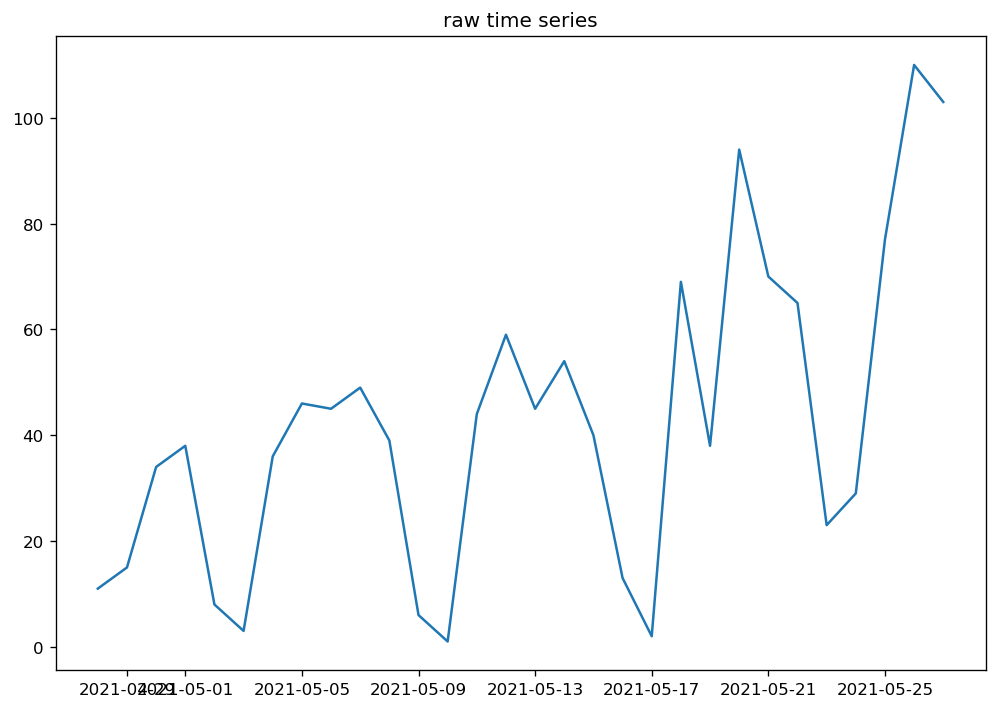

stochastic score
+-------------------+--------------------+---------+------+----------------------------------------------------------------------------------+--------------------+
|        adf        |       pvalue       | usedlag | nobs |                                 critical_values                                  |       icbest       |
+-------------------+--------------------+---------+------+----------------------------------------------------------------------------------+--------------------+
| 1.830662164689511 | 0.9984079305477194 |    7    |  22  | {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373} | 166.05275243041365 |
+-------------------+--------------------+---------+------+----------------------------------------------------------------------------------+--------------------+
stationarity score
+--------------+-------------+
|   lbvalue    |    pvalue   |
+--------------+-------------+
| [7.67265299] | [0.0056064] |
+--------------+----

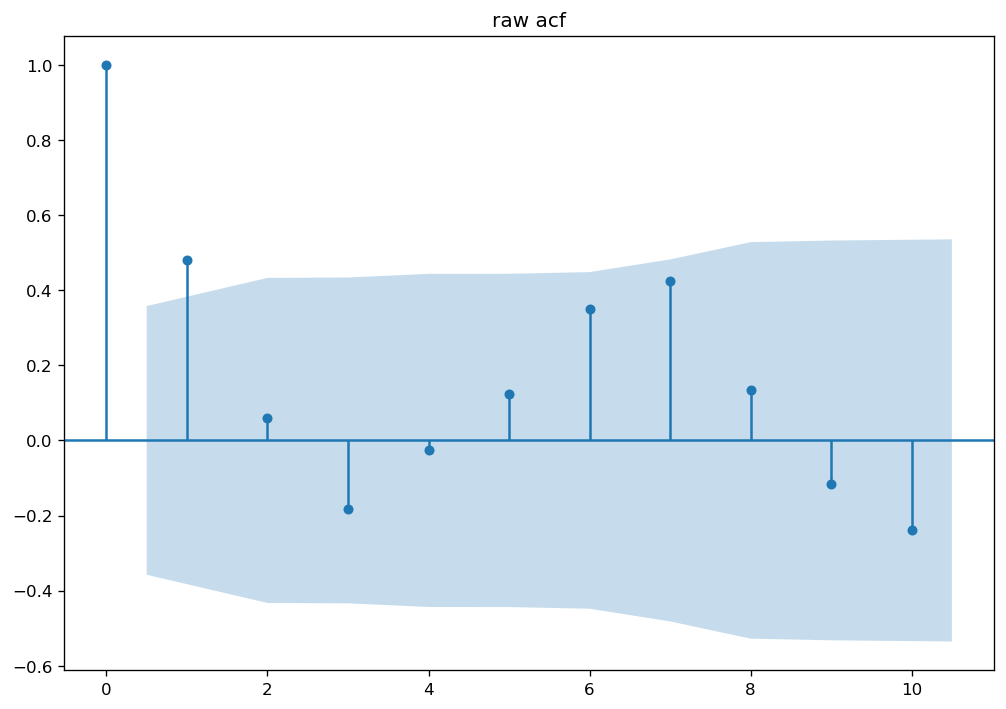

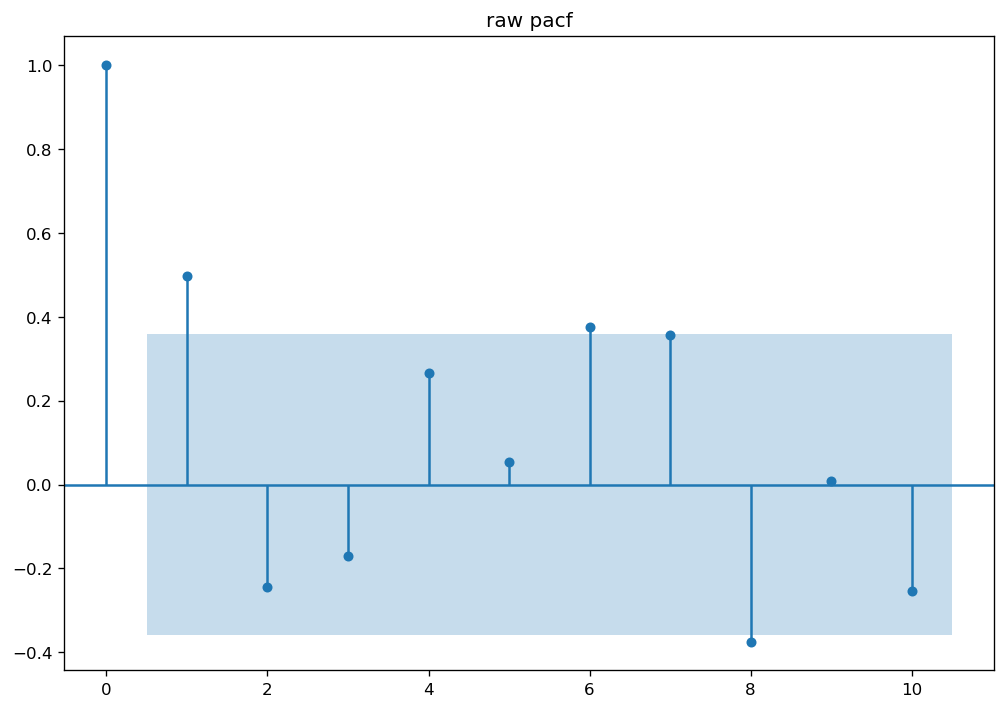

In [ ]:
# ADF test
adf, pvalue1, critical_values = adf_val(dfseries1, 'raw time series', 'raw acf', 'raw pacf')  
# White noise verification
pvalue2 = acorr_val(dfseries1) 

In [ ]:
#stationary processing

def get_best_log(ts, max_log=5, rule1=True, rule2=True):

    if rule1 and rule2: 
        return 0, ts
    else:
        for i in range(1, max_log):
            ts = np.log(ts)
            
            
            where_are_nan = np.isnan(ts)
            where_are_inf = np.isinf(ts)
            ts[where_are_nan] = 0
            ts[where_are_inf] = 0
            
            adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ts)
            lbvalue, pvalue2 = acorr_ljungbox(ts, lags=1)
            rule_1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf < critical_values[
                '10%'] and pvalue1 < 0.01)
            rule_2 = (pvalue2 < 0.05)
            rule_3 = (i < 5)
            if rule_1 and rule_2 and rule_3:
                print ('The best log n is: {0}'.format(i))
                return i, ts

# recover stationary processed data
def recover_log(ts, log_n):

    for i in range(1, log_n + 1):
        ts = np.exp(ts)
    return ts 


In [ ]:
# adf test
rule1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf < critical_values[
    '10%'] and pvalue1 < 0.01)  
# white noise verification
rule2 = (pvalue2[0,] < 0.05)
# use log to do starionay process
log_n, dfseries1 = get_best_log(dfseries1, max_log=5, rule1=rule1, rule2=rule2)

#test stationay processed data
# adf test
adf, pvalue1, critical_values = adf_val(dfseries1, 'final time series', 'final acf', 'final pacf')  
# white noise verification
pvalue2 = acorr_val(dfseries1)  

TypeError: cannot unpack non-iterable NoneType object

as we can see from the test, with only one month data, we cannot stationary process the dataset properly.

In [ ]:
# arma
def arma_fit(ts):

    max_count = int(len(ts) / 10)
    bic = float('inf') 
    tmp_score = []  
    print ('each p/q traning record') 
    print('p  q           aic          bic         hqic')
    for tmp_p in range(max_count + 1): 
        for tmp_q in range(max_count + 1):
            model = ARMA(ts, order=(tmp_p, tmp_q)) 
            try:
                results_ARMA = model.fit(disp=-1, method='css')  
            except:
                continue  
            finally:
                tmp_aic = results_ARMA.aic  #aic
                tmp_bic = results_ARMA.bic  #bic
                tmp_hqic = results_ARMA.hqic  #hqic
                print('{:2d}|{:2d}|{:.8f}|{:.8f}|{:.8f}'.format(tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic))
                tmp_score.append([tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic])  
                if tmp_bic < bic:  
                    p = tmp_p  
                    q = tmp_q  
                    model_arma = results_ARMA  
                    aic = tmp_bic  
                    bic = tmp_bic  
                    hqic = tmp_bic  
    pdq_metrix = np.array(tmp_score)
    pdq_pd = pd.DataFrame(pdq_metrix, columns=['p', 'q', 'aic', 'bic', 'hqic'])
    table_name = ['p', 'q', 'aic', 'bic', 'hqic']
    table_rows = [[p, q, aic, bic, hqic]]
    parameter_table = pre_table(table_name, table_rows)

    print ('best p and q') 
    print (parameter_table)
    return model_arma
  

# train best arma model
model_arma = arma_fit(dfseries1)

each p/q traning record
p  q           aic          bic         hqic
 0| 0|291.25101414|294.05340891|292.14752431
 0| 1|285.18020632|289.38379846|286.52497156
 0| 2|282.85030058|288.45509011|284.64332091
 0| 3|283.40083722|290.40682413|285.64211262
 1| 0|273.65297804|277.75486553|274.93763803
 1| 1|275.37040679|280.83959011|277.08328677
 1| 2|276.79398766|283.63046681|278.93508764
 1| 3|272.69634329|280.90011827|275.26566326
 2| 0|266.32347571|271.65229375|267.95254851
 2| 1|268.05464519|274.71566774|270.09098619
 2| 2|267.32718077|275.32040783|269.77078997
 2| 3|266.60205885|275.92749042|269.45293625
 3| 0|259.03307734|265.51226167|260.95967850
 3| 1|260.11993860|267.89495980|262.43186000
 3| 2|259.37680243|268.44766050|262.07404406
 3| 3|255.21034893|265.57704386|258.29291079
best p and q
+---+---+-------------------+-------------------+-------------------+
| p | q |        aic        |        bic        |        hqic       |
+---+---+-------------------+-------------------+---------

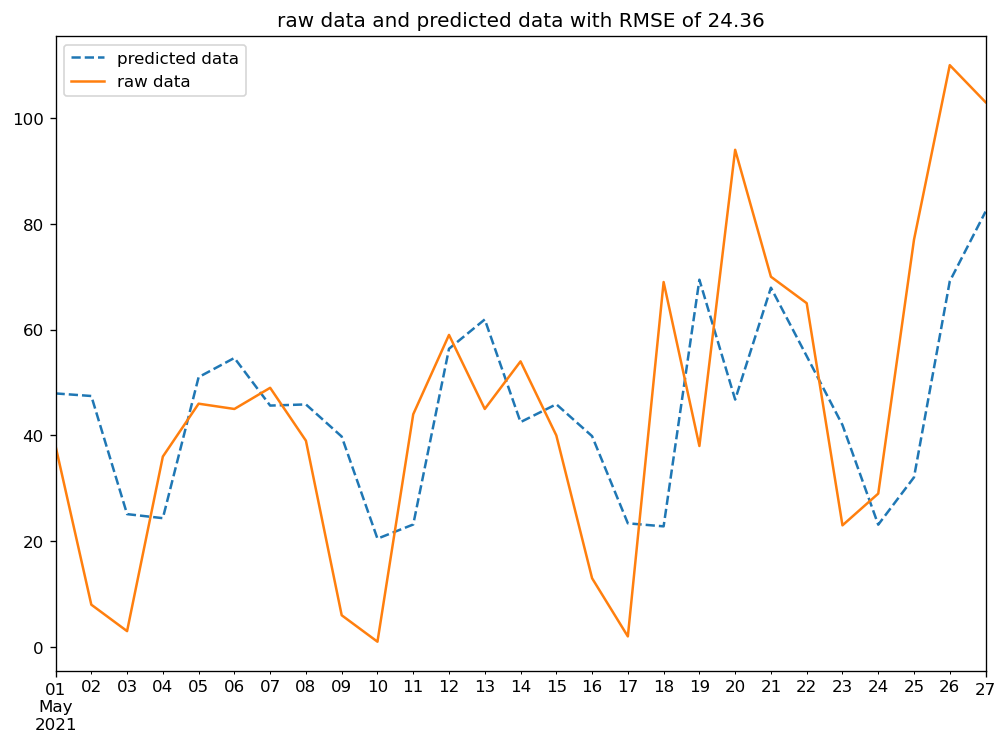

In [ ]:
# evaluation
log_n = 3
def train_test(model_arma, ts, log_n, rule1=True, rule2=True):

    train_predict = model_arma.predict()
    #we are not going to use adf test and white noise verification
    #if not (rule1 and rule2):
        #train_predict = recover_log(train_predict, log_n)
        #ts = dfseries1
    ts_data_new = ts[train_predict.index]
    RMSE = np.sqrt(np.sum((train_predict - ts_data_new) ** 2) / ts_data_new.size)
    plt.figure()
    train_predict.plot(label='predicted data', style='--')
    ts_data_new.plot(label='raw data')
    plt.legend(loc='best')
    plt.title('raw data and predicted data with RMSE of %.2f' % RMSE)
    plt.show()
    return ts
ts_data = train_test(model_arma, dfseries1, log_n, rule1=rule1, rule2=rule2)

-----------predict data----------
2021-05-28    64.055129
2021-05-29    34.449722
2021-05-30    22.575595
2021-05-31    27.338545
2021-06-01    37.989734
2021-06-02    46.432515
2021-06-03    49.245878
2021-06-04    47.652125
Freq: D, dtype: float64


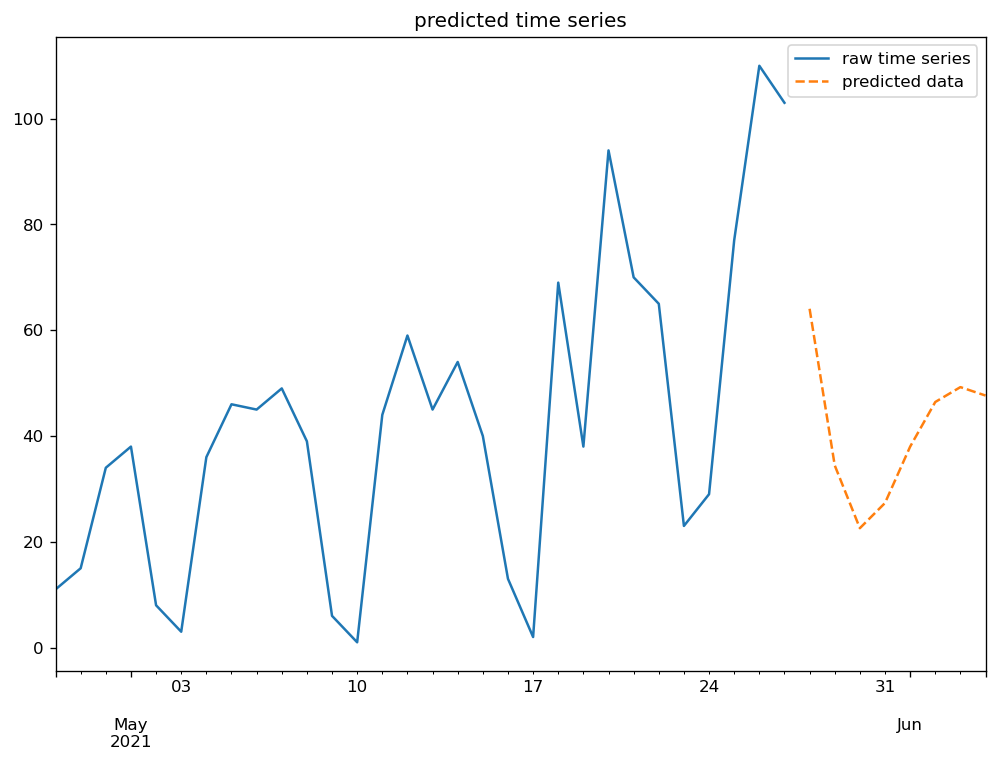

In [ ]:
# predict
def predict_data(model_arma, ts, log_n, start, end, rule1=True, rule2=True):

    predict_ts = model_arma.predict(start=start, end=end)
    print ('-----------predict data----------')
    #we are not going to use adf test and white noise verification
    #if not (rule1 and rule2):
    #    predict_ts = recover_log(predict_ts, log_n)
    print (predict_ts)
    plt.figure()
    ts.plot(label='raw time series')
    predict_ts.plot(label='predicted data', style='--')
    plt.legend(loc='best')
    plt.title('predicted time series')
    

# time
start = '2021-05-28'  
end = '2021-06-04' 
# prediction
predict_data(model_arma, ts_data, log_n, start, end, rule1=rule1, rule2=rule2)

# Tweets scraping

In [ ]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guoxiaochen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/guoxiaochen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guoxiaochen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Imports
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
from datetime import date
from datetime import datetime
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# NLP Imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
import tweepy

In [ ]:
#try with tweepy
consumer_key = "WPwjgyFljRbOTDbDefkHLxezI"
consumer_secret = "3zOQes2neVHmBpzFC6ZsODKjdMM2AnndpPGsSqHXAz3Spdnx9Y"
access_token = "1386005597359796226-PV2V95rO1rtLAClSJTkxcoYQAeNZIP"
access_token_secret = "u2Pq3tvrRDEOTvjPRcqk9tnav4qioEjsaW0ThZuiV23Cx"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
#we select 6000 most recent tweets
text_query = 'Fintech'
startdate = "2020-12-01"
enddate = "2021-05-29"
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search, q=text_query, lang="en", since=startdate, until=enddate).items(6000)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [ ]:
tweets_df.columns = ["time","id","text"]
tweets_df.head()

,time,id,text
0,2021-05-28 23:59:54,1398428850095329285,RT @digitalke1: 600 #NLP Datasets and Glory\n\...
1,2021-05-28 23:59:19,1398428705685389313,RT @Xbond49: Super cool #Smart #desk to start ...
2,2021-05-28 23:58:42,1398428551586758664,RT @automeme: #AI To Generate Exciting Real-ti...
3,2021-05-28 23:58:31,1398428502672744450,RT @Xbond49: Sophia the robot is creating digi...
4,2021-05-28 23:58:04,1398428391355785216,The FinTechs and the Dumbfounded: FinTech and ...


In [ ]:
# Text cleaning
#pip install tweet-preprocessor
import preprocessor as p
stop_words = set(stopwords.words("english"))
more_stopwords = {'&amp', 'amp'}
stop_words = stop_words.union(more_stopwords)

def preprocessor(text):
    #preprocessor package for tweets cleaning
    text = p.clean(text)        
    #remove stopwords
    tokenized = word_tokenize(text)
    text = [w for w in tokenized if not w in stop_words]
    text = " ".join(text)
    
    return text

# Sentiment analysis

In [ ]:
# Sentiment analysis

# 1. Prep the words
sia = SentimentIntensityAnalyzer()

# Add some common negative words/hashtags towards Fintech to help label negative tweets
# Also add postive words and hashtags to mitigate bias and mislabeling
new_words = {
    #Negative new words
    '#bubble': -10.0,
    'bubble': -10.0,
    'exploitation': -20.0,
    'unregulated': -20.0,
    'bust': -20.0,
    'illegal': -10.0,
    'nonlicet': -10.0,
    'saturated': -10.0,
    
    #Positive new words
    'regulated': 20.0,
    'legal': 10.0,
    'progress': 20.0,
    'pioneer': 30.0,
    'forerunner': 30.0,
    'unsaturated': 20.0
}

sia.lexicon.update(new_words)

In [ ]:
def tweets_analysis (tweets_df):
    
    #1. Scrape the tweets
    tweets_df = tweets_df
    
    #2. Clean the tweets
    tweets_df['processedText'] = tweets_df['text'].apply(preprocessor)
    
    #3. Sentiment analysis 
    tweets_df['polarity_scores'] = tweets_df['processedText'].map(lambda text: sia.polarity_scores(text)['compound'])
    tweets_df.loc[tweets_df['polarity_scores'] > 0.2, 'sentiment'] = 'positive' 
    tweets_df.loc[(tweets_df['polarity_scores'] >= -0.2) & (tweets_df['polarity_scores'] <= 0.2)]['sentiment'] = 'neutral'  
    tweets_df.loc[tweets_df['polarity_scores'] < -0.2, 'sentiment'] = 'negative' 
    
    return tweets_df

In [ ]:
tweets_analysis(tweets_df)

<ipython-input-18-3b36fe4fd509>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df[(tweets_df['polarity_scores'] >= -0.2) & (tweets_df['polarity_scores'] <= 0.2)]['sentiment'] = 'neutral'


,time,id,text,processedText,polarity_scores,sentiment
0,2021-05-28 23:59:54,1398428850095329285,RT @digitalke1: 600 #NLP Datasets and Glory\n\...,: Datasets Glory,0.5423,positive
1,2021-05-28 23:59:19,1398428705685389313,RT @Xbond49: Super cool #Smart #desk to start ...,: Super cool start week,0.7351,positive
2,2021-05-28 23:58:42,1398428551586758664,RT @automeme: #AI To Generate Exciting Real-ti...,: To Generate Exciting Real-time D holograms,0.4939,positive
3,2021-05-28 23:58:31,1398428502672744450,RT @Xbond49: Sophia the robot is creating digi...,: Sophia robot creating digital artwork,0.2960,positive
4,2021-05-28 23:58:04,1398428391355785216,The FinTechs and the Dumbfounded: FinTech and ...,The FinTechs Dumbfounded : FinTech Integrated ...,-0.3818,negative
...,...,...,...,...,...,...
5995,2021-05-28 09:30:03,1398209946387468295,RT @ASEANBriefing: #Indonesia's biggest intern...,: 's biggest internet companies announced merg...,0.2732,positive
5996,2021-05-28 09:30:00,1398209933464674304,Takeprofit Tech to Offer Risk Management Solut...,Takeprofit Tech Offer Risk Management Solution,0.0516,NaN
5997,2021-05-28 09:29:46,1398209876908601345,"RT @stedas: ""The United States is the only cou...",: `` The United States country planet viewed X...,0.6369,positive
5998,2021-05-28 09:29:44,1398209868520173570,RT @ASEANBriefing: #E-commerce is set to be th...,: -commerce set main driver growth ; industry ...,0.6705,positive


In [ ]:
tweets_df = tweets_df.fillna('neutral')

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

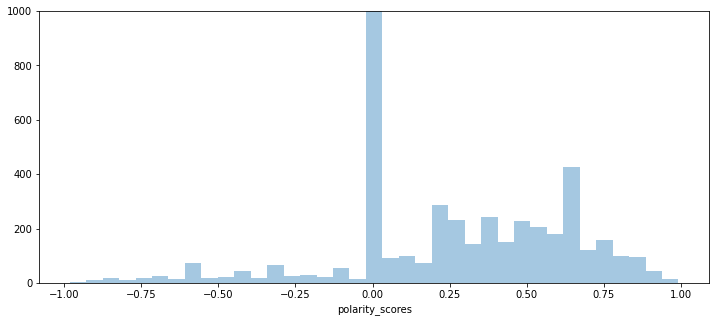

In [ ]:
fig = plt.figure(figsize=(12,5))
sns.distplot(tweets_df['polarity_scores'],kde = False)
plt.ylim(0, 1000)

In [ ]:
#summary of tweets
tweets_df.groupby('sentiment').text.count()

sentiment
negative     398
neutral     2970
positive    2632
Name: text, dtype: int64

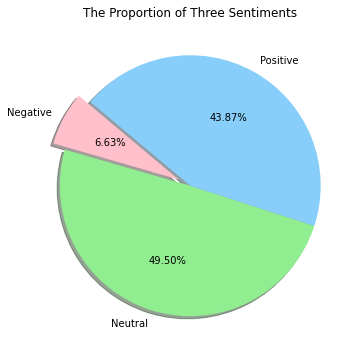

In [ ]:
# pie chart to show the ratio of tweets
fig = plt.figure(figsize=(6,6))
labels = 'Negative', 'Neutral', 'Positive'
sizes = tweets_df.groupby('sentiment').text.count().values
colors = ['pink', 'lightgreen', 'lightskyblue']
explode = (0.1, 0, 0) 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('The Proportion of Three Sentiments')
plt.show()

In [ ]:
# negative tweets
negative_df = tweets_df[tweets_df['sentiment'] == 'negative'].sort_values(by = 'polarity_scores')
negative_df = negative_df.reset_index(drop=True)

In [ ]:
# positive tweets
positive_df = tweets_df[tweets_df['sentiment'] == 'positive'].sort_values(by = 'polarity_scores')
positive_df = positive_df.reset_index(drop=True)

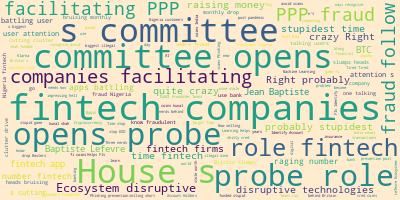

In [ ]:
# Import the wordcloud library
#negative wordcloud
from wordcloud import WordCloud
# Join the different processed titles together.
long_text = ','.join(list(negative_df['processedText'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="blanchedalmond", max_words=5000, contour_width=3, contour_color='firebrick')
# Generate a word cloud
wordcloud.generate(long_text)
# Visualize the word cloud
wordcloud.to_image()

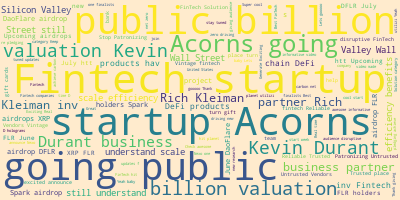

In [ ]:
#positive wordcloud

# Join the different processed titles together.
long_text = ','.join(list(positive_df['processedText'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="blanchedalmond", max_words=5000, contour_width=3, contour_color='firebrick')
# Generate a word cloud
wordcloud.generate(long_text)
# Visualize the word cloud
wordcloud.to_image()

# A Latent Dirichlet Allocation (LDA) Model

In [ ]:
# Topic Modeling Imports
# Install packages for LDA model and visualization
# pip install gensim
# Conda terminal：$conda install -c conda-forge spacy \ python -m spacy download en_core_web_sm \ conda install -c conda-forge pyldavis
import gensim, spacy
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Latent Dirichlet Allocation (LDA)
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(text):
    return [[w for w in i if w not in stop_words] for i in text]
    

def topic_modeling(data,num_topics):
    # Convert sentences to words
    data_words = list(sent_to_words(data))

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    
    #Remove stopwords
    data_words = remove_stopwords(data_words)

    #Create bigrams and trigrams
    data_words = [bigram_mod[text] for text in data_words]
    data_words =  [trigram_mod[bigram_mod[text]] for text in data_words]

    #Lemmatization
    #Initialize spacy 'en' model
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    processed_text = []
    postags=['NOUN', 'ADJ', 'VERB', 'ADV']
    for text in data_words:
        doc = nlp(" ".join(text)) 
        processed_text.append([token.lemma_ for token in doc if token.pos_ in postags])
    
    #Remove stopwords again after lemmatization
    data_words = remove_stopwords(processed_text)
    
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)

    # Create Corpus
    texts = data_words

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=42,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]

    # Model Perplexity (lower the better)
    print('\n\nModel Perplexity: ', lda_model.log_perplexity(corpus)) 

    # Topic Visualization
    pyLDAvis.enable_notebook()
    visualization = gensimvis.prepare(lda_model, corpus, id2word)
    return visualization

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_nega = negative_df['processedText'].values.tolist()
data_posi = positive_df['processedText'].values.tolist()

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
viz_nega = topic_modeling(data_nega, 3)

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.040*"fintech" + 0.021*"fraud" + 0.016*"company" + 0.015*"role" + '
  '0.015*"ppp" + 0.014*"open" + 0.014*"house" + 0.014*"facilitate" + '
  '0.014*"committee" + 0.014*"probe"'),
 (1,
  '0.040*"fintech" + 0.026*"disruptive" + 0.025*"time" + 0.022*"ecosystem" + '
  '0.021*"technology" + 0.020*"raise" + 0.020*"fraud" + 0.017*"money" + '
  '0.015*"lefevre" + 0.015*"bank"'),
 (2,
  '0.024*"bitcoin" + 0.018*"drop" + 0.017*"fintech" + 0.014*"slumps_head" + '
  '0.014*"bruising_monthly" + 0.010*"coin" + 0.009*"make" + 0.008*"reuter" + '
  '0.008*"work" + 0.008*"day"')]


Model Perplexity:  -6.3398934242350995


In [ ]:
pyLDAvis.display(viz_nega)

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
viz_posi = topic_modeling(data_posi, 3)

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"great" + 0.018*"join" + 0.015*"support" + 0.015*"day" + '
  '0.013*"fintech" + 0.012*"help" + 0.012*"bank" + 0.012*"good" + '
  '0.011*"progress" + 0.011*"legal"'),
 (1,
  '0.034*"project" + 0.025*"success" + 0.024*"team" + 0.021*"platform" + '
  '0.019*"chain" + 0.017*"defi" + 0.016*"product" + 0.016*"scale" + '
  '0.016*"benefit" + 0.015*"understand"'),
 (2,
  '0.056*"fintech" + 0.034*"well" + 0.025*"excited" + '
  '0.020*"announce_nexo_one_finalist" + 0.020*"fintech_solution_category" + '
  '0.019*"keep" + 0.019*"thank" + 0.019*"business" + 0.015*"go" + '
  '0.015*"partner"')]


Model Perplexity:  -7.303548896595617


In [ ]:
pyLDAvis.display(viz_posi)

/Users/guoxiaochen/opt/anaconda3/envs/ju/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
